In [1]:
# Split datasets according to first metrics

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk import WordNetLemmatizer
from nltk import word_tokenize
import spicy
import scipy
import seaborn as sns

In [3]:
with open('data/l/train_l.jsonl', 'r') as f:
  a = list(f)

data_l =[]
for element in a:
  data_l.append(json.loads(element))

data_l = pd.DataFrame(data_l)

In [4]:
with open('data/xl/train_xl.jsonl', 'r') as f:
  a = list(f)

data_xl =[]
for element in a:
  data_xl.append(json.loads(element))

data_xl = pd.DataFrame(data_xl)

In [5]:
with open('data/test/test.jsonl', 'r') as f:
  a = list(f)

data_test =[]
for element in a:
  data_test.append(json.loads(element))

data_test = pd.DataFrame(data_test)

In [6]:
data_test

,qID,sentence,option1,option2
0,3QX22DUVOQVY79AVVUY9TVTO8KCVM0-2,Kenneth went cheap on the gemstone present for...,Kenneth,Michael
1,3LOJFQ4BOZTHN4A6JXLZ8WVDJI4DKP-2,There were more holes in the yard of Amy than ...,Amy,Carrie
2,3INZSNUD824X68RFF0UAINHY9KB9D5-2,The dog didn't like its collar but was okay wi...,collar,leash
3,32TMVRKDGPCKS7PCHXN3FNSGBLZ842-2,The door opened louder than the window because...,window,door
4,32TMVRKDGPCKS7PCHXN3FNSGBLZ842-1,The door opened louder than the window because...,window,door
...,...,...,...,...
1762,3YGE63DINABEJK3TWZG7H05PCBI0WF-1,After the break we faxed over the single paper...,paper,document
1763,3BO3NEOQM0FDPDIZFMXLDHKMI5QAIY-2,The man's faith changed after he heard of anot...,science,religion
1764,3YGYP13643NCWKEEYB8Z5DTLSPDNR9-2,The woman had a lot to cope with when her cat ...,cat,dog
1765,3UYRNV2KIVD6EFZIZ22ZEWYH3D78NZ-1,Carrie asked for help caring for her dying erm...,Carrie,Maria


In [7]:
data_xl

,qID,sentence,option1,option2,answer
0,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-2,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,2
1,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-1,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,1
2,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-1,"He never comes to my home, but I always go to ...",home,house,1
3,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-2,"He never comes to my home, but I always go to ...",home,house,2
4,3D5G8J4N5CI2K40F4RZLF9OG2CKVTH-2,"Kyle doesn't wear leg warmers to bed, while Lo...",Kyle,Logan,2
...,...,...,...,...,...
40393,3PKJ68EHDNUOUBAJ3ASD64MQ8GSJHJ-1,I felt lucky because when the fish slipped of ...,pole,net,1
40394,3W1K7D6QSDVJX2B852X30LVRM6WZBL-1,Dennis took months to write back to Kenneth's ...,Dennis,Kenneth,1
40395,3W1K7D6QSDVJX2B852X30LVRM6WZBL-2,Dennis took months to write back to Kenneth's ...,Dennis,Kenneth,2
40396,3BO3NEOQM2VSJ2H6ZK9L5F8V75BAIT-1,My hair looked better in a braid than a ponyta...,braid,ponytail,1


In [8]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm_notebook
import tqdm

In [9]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [10]:
sentence_embeddings_xl = model.encode(list(data_xl['sentence']))

In [11]:
sentence_embeddings_test = model.encode(list(data_test['sentence']))

In [12]:
list_scores = []
for i in tqdm.notebook.tqdm(range(sentence_embeddings_xl.shape[0])):
    list_scores.append(
        cosine_similarity([sentence_embeddings_xl[i]],sentence_embeddings_test)[0]
    )

  0%|          | 0/40398 [00:00<?, ?it/s]

In [13]:
scores_xl_test = pd.DataFrame(np.transpose(list_scores))

In [14]:
np.mean(scores_xl_test[0].sort_values(ascending=False)[:10])

0.8105817

In [15]:
list_scores_xl_test = []
for i in tqdm.notebook.tqdm(range(scores_xl_test.shape[1])):
    list_scores_xl_test.append([i,np.mean(scores_xl_test[i].sort_values(ascending=False)[:int((scores_xl_test.shape[1])/10)])])

  0%|          | 0/40398 [00:00<?, ?it/s]

In [16]:
list_scores_xl_test_fordistrib = [element[1] for element in list_scores_xl_test]

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

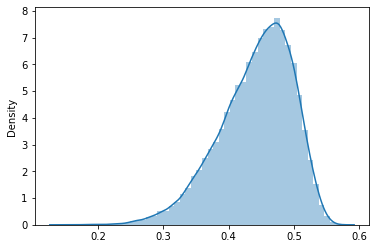

In [23]:
sns.distplot(list_scores_xl_test_fordistrib)

In [21]:
list_scores_xl_test_mean = []
for i in tqdm.notebook.tqdm(range(scores_xl_test.shape[1])):
    list_scores_xl_test_mean.append([i,np.mean(scores_xl_test[i])])

  0%|          | 0/40398 [00:00<?, ?it/s]

In [22]:
list_scores_xl_test_fordistrib_mean = [element[1] for element in list_scores_xl_test_mean]

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

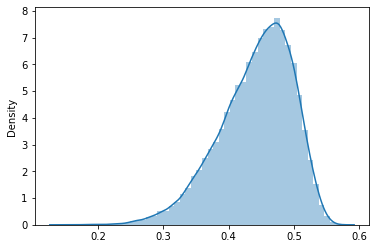

In [23]:
sns.distplot(list_scores_xl_test_fordistrib_mean)

In [24]:
list_scores_xl_test_med = []
for i in tqdm.notebook.tqdm(range(scores_xl_test.shape[1])):
    list_scores_xl_test_med.append([i,np.median(scores_xl_test[i])])

  0%|          | 0/40398 [00:00<?, ?it/s]

In [25]:
list_scores_xl_test_fordistrib_med = [element[1] for element in list_scores_xl_test_med]

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

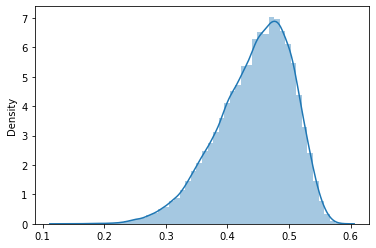

In [26]:
sns.distplot(list_scores_xl_test_fordistrib_med)

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

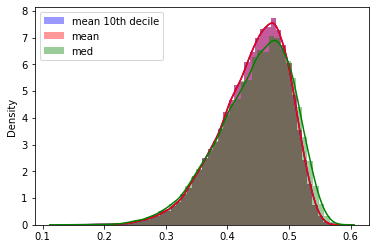

In [28]:
sns.distplot(list_scores_xl_test_fordistrib,color='blue',label='mean 10th decile')
sns.distplot(list_scores_xl_test_fordistrib_mean,color='red',label='mean')
sns.distplot(list_scores_xl_test_fordistrib_med,color='green',label='med')
plt.legend()
plt.show()

In [18]:
a = pd.DataFrame(list_scores_xl_test).sort_values(1,ascending=False)
a

,0,1
20002,20002,0.572139
26116,26116,0.568478
26330,26330,0.566623
15,15,0.564508
31358,31358,0.564185
...,...,...
7100,7100,0.183235
22123,22123,0.179677
35525,35525,0.173271
20687,20687,0.156498


In [19]:
list_split =[list(a[0][i*int(len(data_xl)/10):(i+1)*int(len(data_xl)/10)]) for i in range(9)] + [list(a[0][9*int(len(data_xl)/10):])]

In [19]:
for i in tqdm.notebook.tqdm(range(len(list_split))):
    bracket = data_l.iloc[list_split[i]]
    bracket.to_json(f'data/pre_experiment/splitted_l_sbert_{i}.csv',orient='records',lines=True)

  0%|          | 0/10 [00:00<?, ?it/s]

In [15]:
sentence_embeddings_xl = pd.DataFrame(sentence_embeddings_xl)
sentence_embeddings_xl.to_csv('data/pre_experiment/sentences_bert_768_encoding_s')

In [16]:
scores_xl = pd.DataFrame(list_scores)
scores_xl.to_csv('data/pre_experiment/similarity_bert_encoding_s.csv')

In [20]:
l = [f'splitted_xl_sbert_{i}.jsonl' for i in range(10)]
l

['splitted_xl_sbert_0.jsonl',
 'splitted_xl_sbert_1.jsonl',
 'splitted_xl_sbert_2.jsonl',
 'splitted_xl_sbert_3.jsonl',
 'splitted_xl_sbert_4.jsonl',
 'splitted_xl_sbert_5.jsonl',
 'splitted_xl_sbert_6.jsonl',
 'splitted_xl_sbert_7.jsonl',
 'splitted_xl_sbert_8.jsonl',
 'splitted_xl_sbert_9.jsonl']

In [ ]:
import os

In [ ]:
compteur = 0
for doc in l:
    print('')
    print('---------------------')
    print(f'Tryout number {compteur}')
    print('---------------------')
    print('')
    os.rename(f'data/pre_experiment/{doc}',
              'data/pre_experiment/train.jsonl')
    !python python ./scripts/run_experiment.py --model_type roberta_mc --model_name_or_path roberta-large --task_name winogrande --do_eval --do_lower_case --data_dir data/pre_experiment --max_seq_length 80 --per_gpu_eval_batch_size 4 --per_gpu_train_batch_size 16 --learning_rate 1e-5 --num_train_epochs 3 --output_dir f'output/models_{compteur}/' --do_train --logging_steps 4752 --save_steps 4750 --seed 42 --data_cache_dir ./output/cache/ --warmup_pct 0.1 --evaluate_during_training
    os.rename('data/pre_experiment/train.jsonl',
              f'data/pre_experiment/{doc}')
    compteur +=1